In [38]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [39]:
## Reading in the data
fires = pd.read_csv("df_QuarterSector_CA_1992_2018_True3and5Av.csv")
fires.head()

,Sector,Q,Year,Burn,Slr_Tot,MnWndSp_Av,MnWndDir_Av,MaxWndGst,AvAirT_Av,AvAirT_AvDMax,...,AvAirT_Av_5,AvAirT_AvDMax_5,AvAirT_Max_5,AvAirT_AvDMin_5,AvAirT_Min_5,AvHum_Av_5,AvHum_Max_5,AvHum_Min_5,Precip_Tot_5,BurnFrCh
0,0,1,1992,92.2,0.0,0.073278,0.012646,-0.119249,0.061706,0.035769,...,0.061706,0.035769,0.004654,0.097781,0.682232,-0.253551,-0.096265,-0.407430,-0.438836,-0.450850
1,0,2,1992,6457.0,0.0,0.100879,0.062195,0.494236,0.091426,0.088843,...,0.076566,0.062306,0.032547,0.095321,0.360373,-0.183629,-0.041720,-0.387987,-0.478321,-0.469665
2,0,3,1992,74943.7,0.0,0.141522,0.516184,0.184578,0.005348,-0.001681,...,0.052826,0.040977,0.024636,0.065978,0.223777,-0.138329,-0.017073,-0.333035,-0.470012,-0.075560
3,0,4,1992,365.1,0.0,0.135283,0.040399,0.109643,-0.029742,-0.015678,...,0.032184,0.026813,0.018601,0.032827,0.145657,-0.093192,-0.008157,-0.293254,-0.337562,-0.962551
4,0,1,1993,24.4,0.0,0.030207,-0.024922,-0.031629,-0.090862,-0.095361,...,0.007575,0.002378,-0.006838,0.009316,0.028678,-0.039078,-0.003671,-0.106159,-0.297954,-0.854672


In [40]:
## Check for data balance 
fires['Fire_100'] = np.where(fires['Burn']<100,0,1)
print("For area =",100,"\n",fires['Fire_100'].value_counts())

For area = 100 
 1    451
0     89
Name: Fire_100, dtype: int64


In [41]:
fires= fires.drop(['Burn'], axis=1)
fires.head(1)

,Sector,Q,Year,Slr_Tot,MnWndSp_Av,MnWndDir_Av,MaxWndGst,AvAirT_Av,AvAirT_AvDMax,AvAirT_Max,...,AvAirT_AvDMax_5,AvAirT_Max_5,AvAirT_AvDMin_5,AvAirT_Min_5,AvHum_Av_5,AvHum_Max_5,AvHum_Min_5,Precip_Tot_5,BurnFrCh,Fire_100
0,0,1,1992,0.0,0.073278,0.012646,-0.119249,0.061706,0.035769,0.004654,...,0.035769,0.004654,0.097781,0.682232,-0.253551,-0.096265,-0.40743,-0.438836,-0.45085,0


# Exploratory Data Analysis

In [42]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sector           540 non-null    int64  
 1   Q                540 non-null    int64  
 2   Year             540 non-null    int64  
 3   Slr_Tot          540 non-null    float64
 4   MnWndSp_Av       540 non-null    float64
 5   MnWndDir_Av      540 non-null    float64
 6   MaxWndGst        540 non-null    float64
 7   AvAirT_Av        540 non-null    float64
 8   AvAirT_AvDMax    540 non-null    float64
 9   AvAirT_Max       540 non-null    float64
 10  AvAirT_AvDMin    540 non-null    float64
 11  AvAirT_Min       540 non-null    float64
 12  AvHum_Av         540 non-null    float64
 13  AvHum_Max        540 non-null    float64
 14  AvHum_Min        540 non-null    float64
 15  Precip_Tot       540 non-null    float64
 16  Slr_Tot_3        540 non-null    float64
 17  MnWndSp_Av_3    

In [43]:
##Check for null values
fires.isnull().sum()

Sector             0
Q                  0
Year               0
Slr_Tot            0
MnWndSp_Av         0
MnWndDir_Av        0
MaxWndGst          0
AvAirT_Av          0
AvAirT_AvDMax      0
AvAirT_Max         0
AvAirT_AvDMin      0
AvAirT_Min         0
AvHum_Av           0
AvHum_Max          0
AvHum_Min          0
Precip_Tot         0
Slr_Tot_3          0
MnWndSp_Av_3       0
MnWndDir_Av_3      0
MaxWndGst_3        0
AvAirT_Av_3        0
AvAirT_AvDMax_3    0
AvAirT_Max_3       0
AvAirT_AvDMin_3    0
AvAirT_Min_3       0
AvHum_Av_3         0
AvHum_Max_3        0
AvHum_Min_3        0
Precip_Tot_3       0
Slr_Tot_5          0
MnWndSp_Av_5       0
MnWndDir_Av_5      0
MaxWndGst_5        0
AvAirT_Av_5        0
AvAirT_AvDMax_5    0
AvAirT_Max_5       0
AvAirT_AvDMin_5    0
AvAirT_Min_5       0
AvHum_Av_5         0
AvHum_Max_5        0
AvHum_Min_5        0
Precip_Tot_5       0
BurnFrCh           0
Fire_100           0
dtype: int64

No null or missing values present. All features are numerical, no categoricals present.

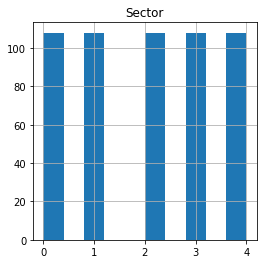

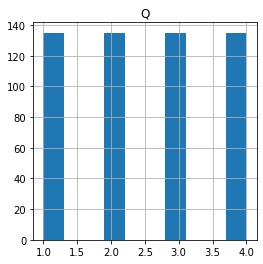

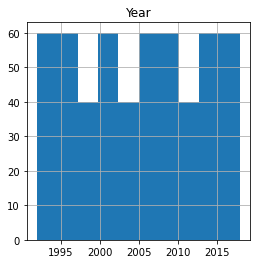

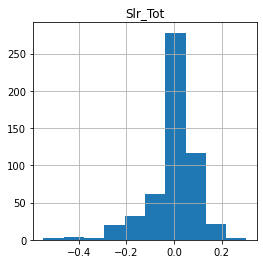

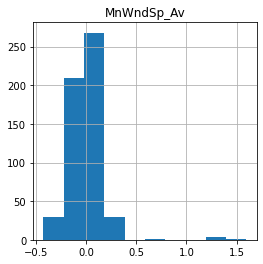

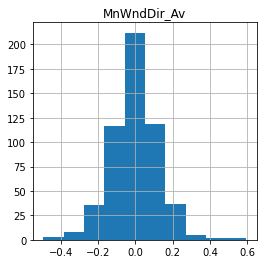

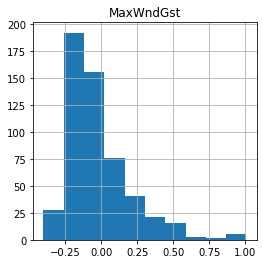

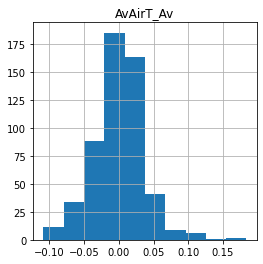

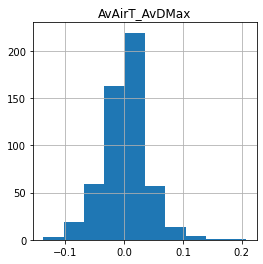

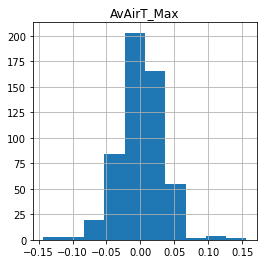

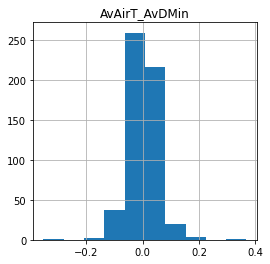

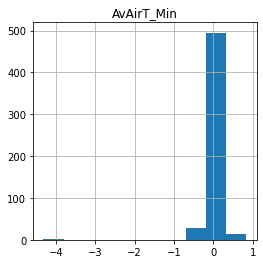

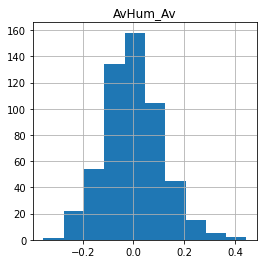

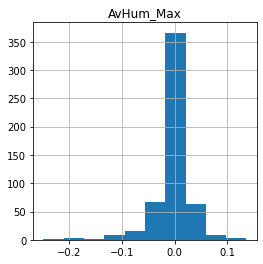

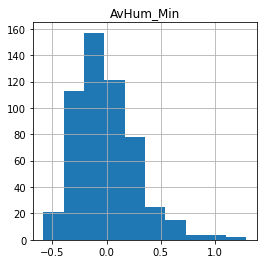

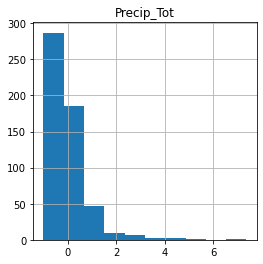

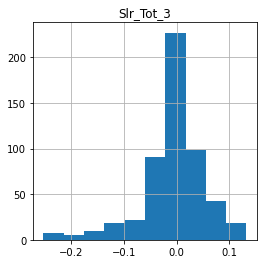

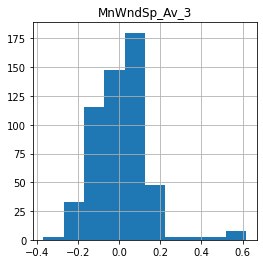

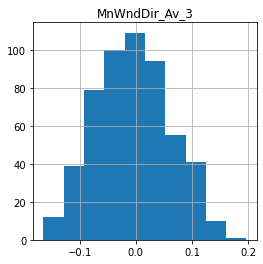

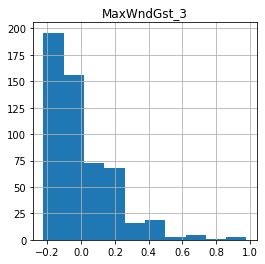

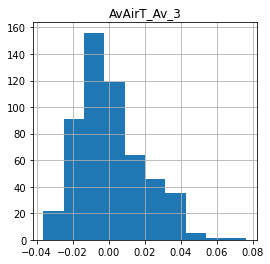

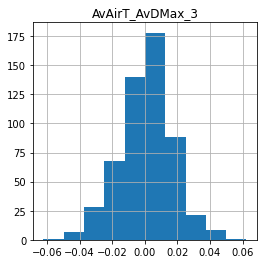

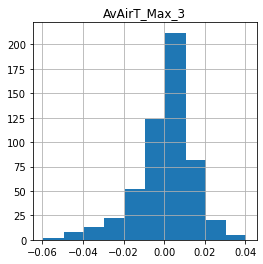

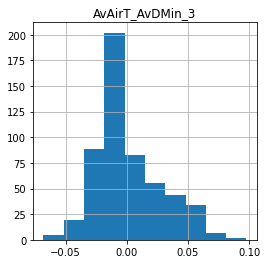

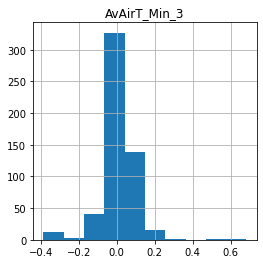

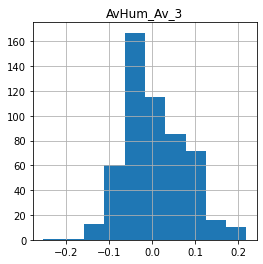

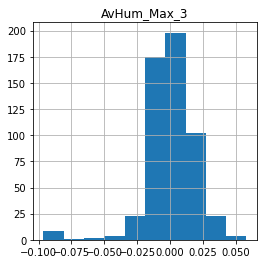

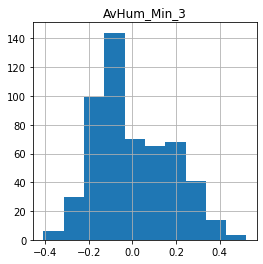

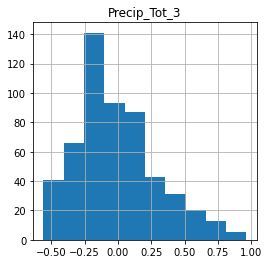

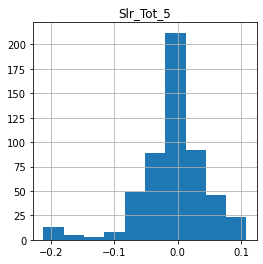

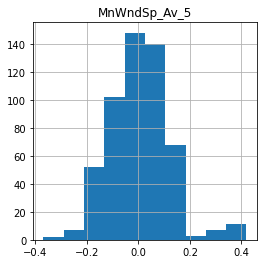

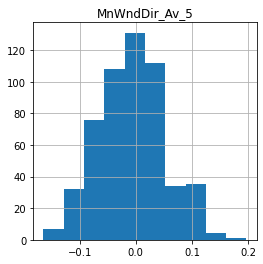

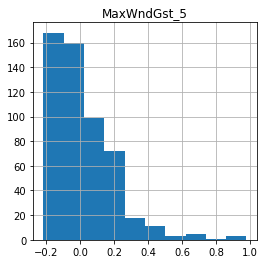

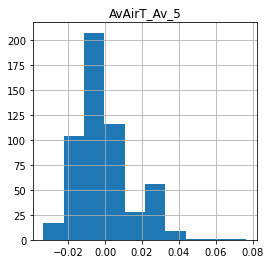

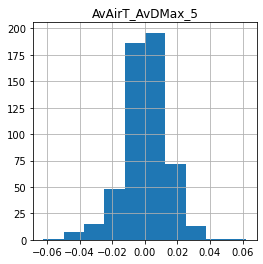

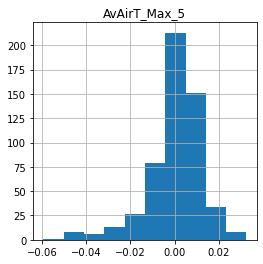

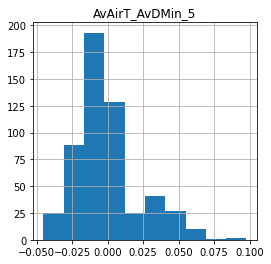

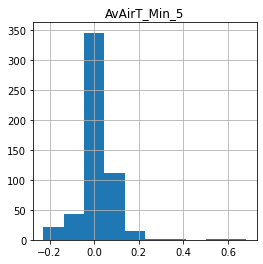

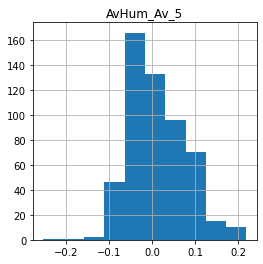

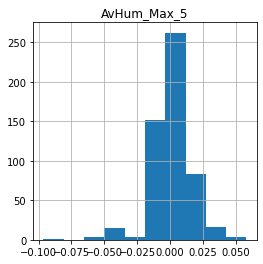

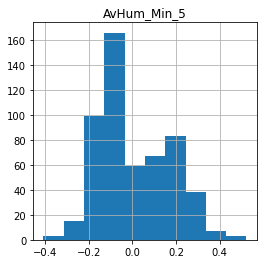

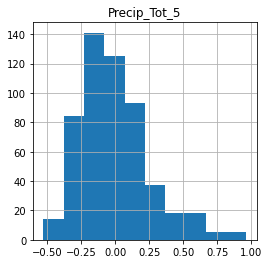

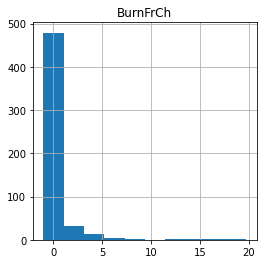

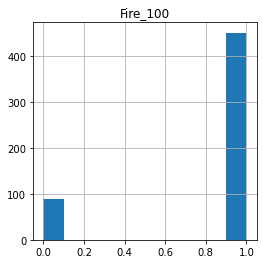

In [44]:
##Checking each feature for outliers and skew
feats = fires.columns
for f in feats:
    plt.figure(figsize=(4,4))
    fires[f].hist()
    plt.title(f)
    plt.show()

# Feature Selection

In [45]:
X = fires.drop(['Fire_100'], axis=1)
Y = fires['Fire_100']


In [46]:
## Train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=614,shuffle=True,stratify=Y) 

In [47]:
# Check for data balance
Y_train.value_counts()

1    338
0     67
Name: Fire_100, dtype: int64

Data is imbalanced. Will balance using SMOTE oversampling. 

In [48]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, Y_train = oversample.fit_resample(X_train,Y_train)

In [49]:
Y_train.value_counts()

1    338
0    338
Name: Fire_100, dtype: int64

In [50]:
# Check for features with low variance
# first normalize each feature to make variances comparable between features
X_train_norm = X_train/X_train.mean()
features_train = X_train_norm.columns
for feat in features_train:
    threshold = 0.001
    variance = X_train_norm[feat].var()
    if (variance<threshold):
        print(feat, "should be dropped")

Year should be dropped


This makes sense because normalized year column is not sensible and there won't be too much variation as data is over 16 years. Anyway the year column will be irrelevant in the analysis because the year dependent parameters have already been categorized as past 1 year, 3 year and 5 year averages. 

In [51]:
X_train = X_train.drop(['Year'],axis=1)

In [52]:
X_train.shape

(676, 42)

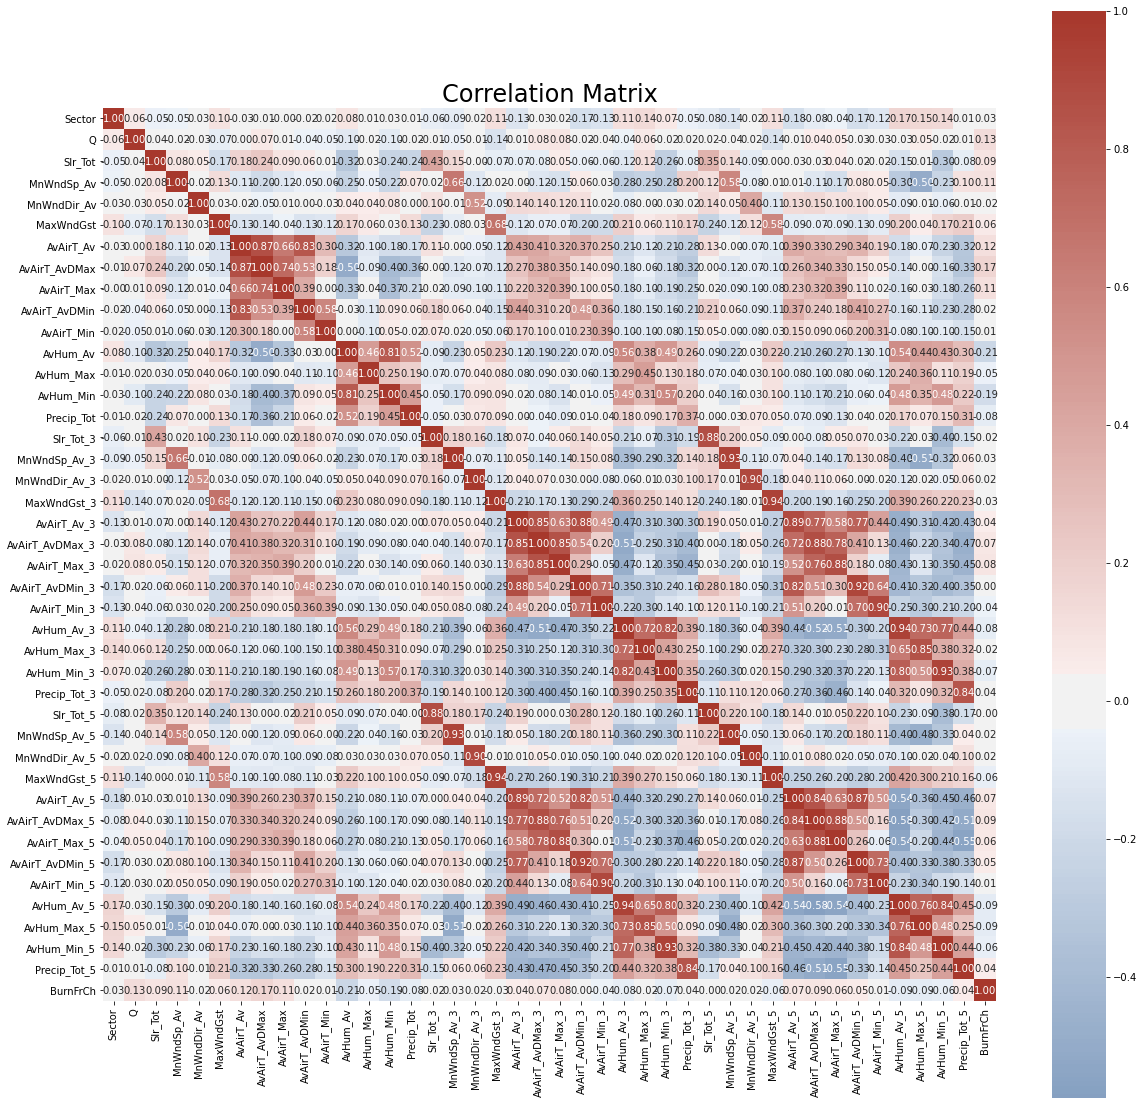

In [55]:
# Check for correlated features
# Using pearson correlation coefficient and generating a heatmap
correlation = X_train.corr()
plt.figure(figsize=(20,20))
# Create custom diverging palette to map the map easy to read
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
cmap = sns.heatmap(correlation, center=0, annot=True, 
                fmt='.2f', square=True, cmap=cmap)
plt.title('Correlation Matrix', fontsize=24)
plt.savefig('correlation_matrix.png')

Many features seem correlated so removing them based on threshold value.

In [56]:
def correlation(dataframe,threshold):
    col_corr = set()
    corr_matrix = dataframe.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [57]:
# Identifying features with high correlation, pearson coefficient>0.8
corr_cols = list(correlation(X_train,0.8))
print(corr_cols)

['AvHum_Min', 'AvHum_Min_5', 'AvAirT_Max_3', 'AvHum_Min_3', 'AvAirT_AvDMin_3', 'MaxWndGst_5', 'Slr_Tot_5', 'AvAirT_AvDMax_5', 'AvAirT_AvDMin_5', 'AvAirT_Min_5', 'Precip_Tot_5', 'AvAirT_Max_5', 'MnWndDir_Av_5', 'AvHum_Av_5', 'AvAirT_Av_5', 'AvAirT_AvDMin', 'AvAirT_AvDMax', 'AvAirT_AvDMax_3', 'AvHum_Max_5', 'MnWndSp_Av_5']


In [58]:
# Dropping highly correlated columns
X_train = X_train.drop(corr_cols,axis=1)

In [59]:
X_train.shape

(676, 22)

In [60]:
## Selecting features using Information Gain
from sklearn.feature_selection import mutual_info_classif

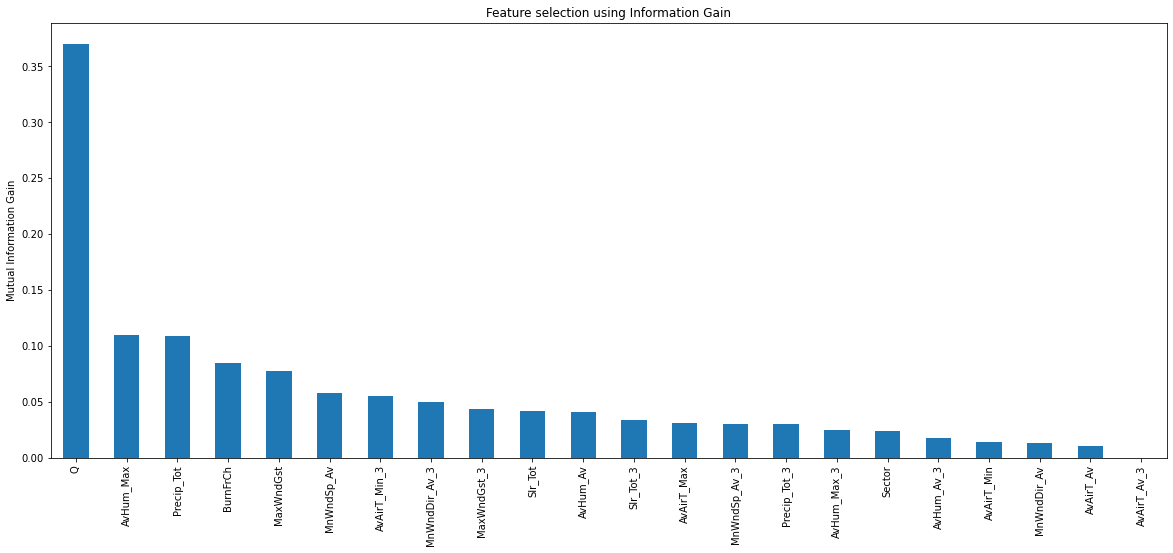

In [61]:
mutual_info = mutual_info_classif(X_train,Y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))
plt.ylabel('Mutual Information Gain')
plt.title('Feature selection using Information Gain')
plt.savefig('info_gain.png')

In [62]:
mutual_info.sort_values(ascending=False)

Q                0.370304
AvHum_Max        0.109592
Precip_Tot       0.108908
BurnFrCh         0.084538
MaxWndGst        0.077614
MnWndSp_Av       0.058043
AvAirT_Min_3     0.055640
MnWndDir_Av_3    0.049816
MaxWndGst_3      0.043789
Slr_Tot          0.041957
AvHum_Av         0.041266
Slr_Tot_3        0.034092
AvAirT_Max       0.031223
MnWndSp_Av_3     0.030426
Precip_Tot_3     0.030373
AvHum_Max_3      0.025101
Sector           0.023795
AvHum_Av_3       0.017550
AvAirT_Min       0.014330
MnWndDir_Av      0.013395
AvAirT_Av        0.010880
AvAirT_Av_3      0.000000
dtype: float64

Two features (MnWndDir_Av and AvAirT_Av_3) do not have any dependence on target so we can remove those without impacting the prediction model. Some other features with low dependence (<0.02) can also be removed without compromising on the model efficacy.

In [24]:
# Dropping columns with mutual information < 0.02 (keeping top 16 columns)
from sklearn.feature_selection import SelectKBest
selected_cols = SelectKBest(mutual_info_classif,k=16)
selected_cols.fit(X_train,Y_train)
keep_cols = X_train.columns[selected_cols.get_support()]

In [25]:
X_train = X_train[keep_cols]
X_train.shape

(676, 16)

In [26]:
# Removing discarded columns from test data
good_cols = X_train.columns
X_test = X_test[good_cols]
X_test.shape

(135, 16)

# Model Building

First let's check for trivial case metrics such as if all are predicted zero or one.

In [27]:
Y_test.shape

(135,)

In [28]:
np_zeros = np.zeros(135, dtype=np.int8)
np_ones = np.ones(135, dtype=np.int8)
y_zeros = pd.Series(np_zeros)
y_ones = pd.Series(np_ones)

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("Zeros accuracy is",accuracy_score(Y_test,y_zeros))
print("Zeros precision is",precision_score(Y_test,y_zeros))
print("Zeros recall is",recall_score(Y_test,y_zeros))

Zeros accuracy is 0.16296296296296298
Zeros precision is 0.0
Zeros recall is 0.0


C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
print("Ones accuracy is",accuracy_score(Y_test,y_ones))
print("Ones precision is",precision_score(Y_test,y_ones))
print("Ones recall is",recall_score(Y_test,y_ones))

Ones accuracy is 0.837037037037037
Ones precision is 0.837037037037037
Ones recall is 1.0


If all are predicted one then the recall will be very high but precision and accuracy will suffer so we should aim to optimize recall keeping precision and accuracy above a certain threshold higher than ~85%. We will perform hyper-parameter tuning for various models to maximize recall (reducing false negative) while keeping the precision reasonably high (reducing false positive). 

The dataset is not scaled and also has skewed distribution with outliers for many features. Therefore, we will choose classification mechanisms that are robust to outliers and non-gaussian distributions and do not require scaling (don't use Euclidean distance based decision making). Tree-based models satisfy all of these requirements.

## Decision Tree

In [31]:
# Importing packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

CV Mean Accuracy is [0.90234205 0.93043573 0.92007625 0.93340959 0.93342048 0.9319281
 0.93786492 0.93046841 0.93194989 0.92602397]
CV Mean Precision is [0.91817054 0.9160572  0.91984774 0.94615017 0.95477518 0.95444475
 0.95557782 0.95460178 0.95491756 0.94819706]
CV Mean Recall is [0.88459175 0.94964881 0.92304653 0.91992976 0.91115013 0.90807726
 0.92001756 0.90535558 0.90820896 0.9022827 ]


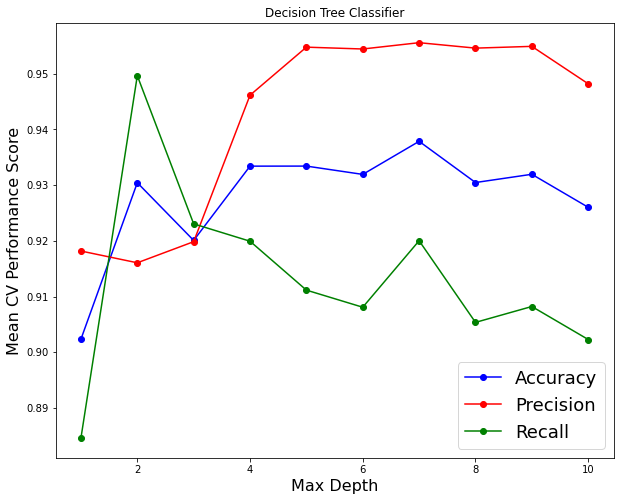

In [32]:
## Performing 5-fold Cross-validation while iterating max_depth
kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state=440)
n=10
accs = np.zeros((5,n))
precs = np.zeros((5,n))
recs = np.zeros((5,n))
for j in range(1,n+1):
    tree_clf = DecisionTreeClassifier(max_depth=j,random_state=614)
    i=0
    for train_index,test_index in kfold.split(X_train,Y_train):
        X_train_train,X_train_test = X_train.iloc[train_index],X_train.iloc[test_index]
        Y_train_train,Y_train_test = Y_train.iloc[train_index],Y_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test)
    
        tree_clf_clone = clone(tree_clf)
        tree_clf_clone.fit(X_train_train,Y_train_train)
        Y_predict = tree_clf_clone.predict(X_train_test)
        accs[i,j-1] = accuracy_score(Y_train_test,Y_predict)
        precs[i,j-1] = precision_score(Y_train_test,Y_predict)
        recs[i,j-1] = recall_score(Y_train_test,Y_predict)
        i = i + 1

print("CV Mean Accuracy is",np.mean(accs,axis=0))
print("CV Mean Precision is",np.mean(precs,axis=0))
print("CV Mean Recall is",np.mean(recs,axis=0))

plt.figure(figsize=(10,8))

plt.plot(range(1,n+1), np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), np.mean(precs,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), np.mean(recs,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=18)
plt.title("Decision Tree Classifier")

plt.savefig("Decision_tree_metrics.png")

Decision Tree with max-depth=2 seems to be performing very well (High recall and reasonable precision). But DT could overfit. Let's test the scores on test data to check for overfitting.

In [33]:
tree_clf = DecisionTreeClassifier(max_depth=2,random_state=614)
tree_clf.fit(X_test,Y_test)
Y_predict_dt = tree_clf.predict(X_test)
acc_dt = accuracy_score(Y_test,Y_predict_dt)
prec_dt = precision_score(Y_test,Y_predict_dt)
rec_dt = recall_score(Y_test,Y_predict_dt)

print("CV Mean Accuracy is",acc_dt)
print("CV Mean Precision is",prec_dt)
print("CV Mean Recall is",rec_dt)


CV Mean Accuracy is 0.9555555555555556
CV Mean Precision is 0.9819819819819819
CV Mean Recall is 0.9646017699115044


Recall decreased compare to precision while we were looking for higher recall at the expense of precision.

## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

CV Mean Accuracy is [0.94376906 0.95265795 0.95858388 0.96302832 0.96006536 0.96301743
 0.96153595 0.96005447 0.96005447 0.96005447]
CV Mean Precision is [0.96440747 0.96230875 0.96849635 0.97104581 0.96529515 0.96555636
 0.96551113 0.96286103 0.96286103 0.96286103]
CV Mean Recall is [0.92304653 0.94381036 0.94978051 0.95566286 0.95566286 0.96158911
 0.95860404 0.95860404 0.95860404 0.95860404]


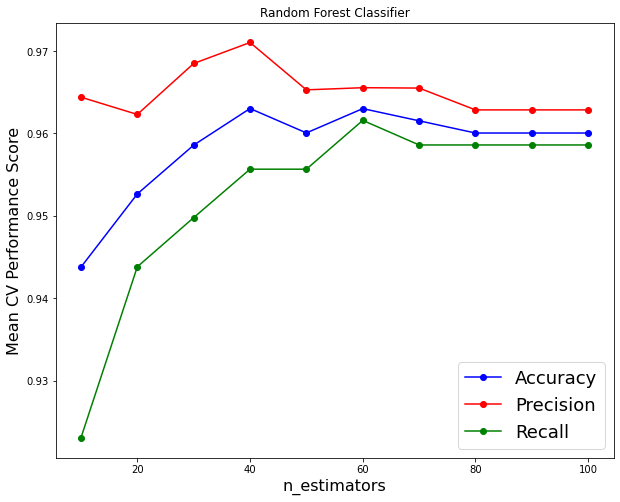

In [35]:
## Performing 5-fold Cross-validation while iterating n_estimators
kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state=440)
trees =np.arange(10,110,10)
accs_rf = np.zeros((5,len(trees)))
precs_rf = np.zeros((5,len(trees)))
recs_rf = np.zeros((5,len(trees)))
for j in range(len(trees)):
    rf_clf = RandomForestClassifier(n_estimators=trees[j-1],random_state=614)
    i=0
    for train_index,test_index in kfold.split(X_train,Y_train):
        X_train_train,X_train_test = X_train.iloc[train_index],X_train.iloc[test_index]
        Y_train_train,Y_train_test = Y_train.iloc[train_index],Y_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test)
    
        rf_clf_clone = clone(rf_clf)
        rf_clf_clone.fit(X_train_train,Y_train_train)
        Y_predict = rf_clf_clone.predict(X_train_test)
        accs_rf[i,j-1] = accuracy_score(Y_train_test,Y_predict)
        precs_rf[i,j-1] = precision_score(Y_train_test,Y_predict)
        recs_rf[i,j-1] = recall_score(Y_train_test,Y_predict)
        i = i + 1

print("CV Mean Accuracy is",np.mean(accs_rf,axis=0))
print("CV Mean Precision is",np.mean(precs_rf,axis=0))
print("CV Mean Recall is",np.mean(recs_rf,axis=0))

plt.figure(figsize=(10,8))

plt.plot(np.arange(10,110,10), np.mean(accs_rf,axis=0),'b-o', label="Accuracy")
plt.plot(np.arange(10,110,10), np.mean(precs_rf,axis=0),'r-o', label="Precision")
plt.plot(np.arange(10,110,10), np.mean(recs_rf,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("n_estimators",fontsize=16)

plt.legend(fontsize=18)
plt.title("Random Forest Classifier")

plt.savefig('Random_forest_metrics.png')

The recall is highest for n_estimators=50. The precision is also quite high at this value. Let's check with test data.

In [36]:
rf_clf_test = RandomForestClassifier(n_estimators=10,random_state=614)
rf_clf_test.fit(X_test,Y_test)
Y_predict_rf = rf_clf_test.predict(X_test)
acc_rf = accuracy_score(Y_test,Y_predict_rf)
prec_rf = precision_score(Y_test,Y_predict_rf)
rec_rf = recall_score(Y_test,Y_predict_rf)

print("CV Mean Accuracy is",acc_rf)
print("CV Mean Precision is",prec_rf)
print("CV Mean Recall is",rec_rf)

CV Mean Accuracy is 1.0
CV Mean Precision is 1.0
CV Mean Recall is 1.0
